In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth
from matplotlib import pyplot as plt
import plotly.express as px
import networkx as nx
import plotly.graph_objects as go
import seaborn as sns

In [2]:
df = pd.read_csv('col_names_trans_data(Sheet1)id.csv')
df.fillna(0, inplace=True)
df = df.drop(['ID'], axis=1)
df

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,Health,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,...,0,0,0,0,0,0,0,0,0,0
1,Health,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,...,0,0,0,0,0,0,0,0,0,0
2,Health,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,...,0,0,0,0,0,0,0,0,0,0
3,Health,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,...,0,0,0,0,0,0,0,0,0,0
4,Health,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1603,Bipolar Disorder,Eubacterium,Oscillibacter,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1604,Health,Bacteroides,Paraprevotella,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1605,Bipolar Disorder,Odoribacter,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1606,Bipolar Disorder,Bacteroides,Prevotella,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df_list = df.values.tolist()
df_list_transp = df.apply(lambda row: row.tolist(), axis=1)
df_list_transp.head()

0    [Health, Alistipes, Bacteroides, Bifidobacteri...
1    [Health, Alistipes, Bacteroides, Bifidobacteri...
2    [Health, Alistipes, Bacteroides, Bifidobacteri...
3    [Health, Alistipes, Bacteroides, Bifidobacteri...
4    [Health, Alistipes, Bacteroides, Bifidobacteri...
dtype: object

In [4]:
items = set()
for col in df:
    items.update(df[col].unique())
print(items)

{0, 'Blautia', 'Acinetobacter', 'Paraprevotella', 'Streptococcus', 'Ruminiclostridium', 'Odoribacter', 'Anaerofilum', 'Barnesiella', 'Phocaeicola', 'Lactobacillus', 'Desulfovibrio', 'Flavonifractor', 'Bifidobacterium', 'Bipolar Disorder', 'Clostridium', 'Health', 'Anaerotruncus', 'Ruminococcus', 'Parabacteroides', 'Prevotella', 'Pseudomonas', 'Oscillospira', 'Ligilactobacillus', 'Coprococcus', 'Agathobacter', 'Collinsella', 'Sporobacter', 'Akkermansia', 'Oscillibacter', 'Sutterella', 'Anaerobutyricum', 'Depression', 'Roseburia', 'Bacteroides', 'Eubacterium', 'Ruminococcaceae', 'Holdemania', 'Epilepsy', 'Erysipelatoclostridium', 'Mediterraneibacter', 'Lachnospira', 'Veillonella', 'Lachnoclostridium', 'Bacillus', 'Corynebacterium', 'Intestinibacter', 'Schizophrenia', 'Parkinsons', 'Dialister', 'Eggerthella', 'Alzheimers', 'Alistipes', 'Tidjanibacter', 'Dorea', 'Anaerostipes', 'Bipolar Disorder, Depression, Epilepsy, Schizophrenia', 'Parasutterella', 'Escherichia', 'Faecalibacterium', 'Bi

In [7]:
itemset = set(items)
encoded_vals = []
for index, row in df.iterrows():
    rowset = set(row)
    labels = {}
    uncommons = list(itemset - rowset)
    commons = list(itemset.intersection(rowset))
    for uc in uncommons:
        labels[uc] = 0
    for com in commons:
        labels[com] = 1
    encoded_vals.append(labels)

ohe_df = pd.DataFrame(encoded_vals).drop(columns=0)
ohe_df.head()


,Acinetobacter,Paraprevotella,Streptococcus,Ruminiclostridium,Odoribacter,Anaerofilum,Barnesiella,Phocaeicola,Lactobacillus,Desulfovibrio,...,Roseburia,Bacteroides,Clostridium,Eubacterium,Health,Parabacteroides,Dorea,Ruminococcus,Faecalibacterium,Oscillibacter
0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
2,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
3,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


In [8]:
ohe_df = ohe_df.astype(bool)
ohe_df.dtypes

Acinetobacter        bool
Paraprevotella       bool
Streptococcus        bool
Ruminiclostridium    bool
Odoribacter          bool
                     ... 
Parabacteroides      bool
Dorea                bool
Ruminococcus         bool
Faecalibacterium     bool
Oscillibacter        bool
Length: 61, dtype: object

In [87]:
freq_items = apriori(ohe_df, min_support=0.75, use_colnames=True, verbose=1, max_len=3)

Processing 471 combinations | Sampling itemset size 3


In [88]:
conf_rules = association_rules(freq_items, metric="confidence", min_threshold=0.75)

len(conf_rules)

734

In [52]:
sup_rules = association_rules(freq_items, metric='support', min_threshold=0.75)
len(sup_rules)

734

In [53]:
lift_rules = association_rules(freq_items, metric='lift', min_threshold=0.75)
len(lift_rules)

39734

In [54]:
conf_sorted_rules = conf_rules.sort_values(by="confidence", ascending=False)
conf_sorted_rules.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
20580,"(Bipolar Disorder, Depression, Epilepsy, Schiz...",(Lachnoclostridium),0.017413,0.731343,0.017413,1.0,1.367347,0.004678,inf,0.273418
8297,"(Barnesiella, Roseburia)",(Bacteroides),0.598881,0.935945,0.598881,1.0,1.068439,0.038361,inf,0.159690
13606,"(Bipolar Disorder, Depression, Epilepsy, Schiz...",(Faecalibacterium),0.012438,0.906716,0.012438,1.0,1.102881,0.001160,inf,0.094458
13605,"(Bipolar Disorder, Depression, Epilepsy, Schiz...",(Ruminococcus),0.012438,0.886194,0.012438,1.0,1.128421,0.001415,inf,0.115239
13604,"(Bipolar Disorder, Depression, Epilepsy, Schiz...",(Parabacteroides),0.012438,0.859453,0.012438,1.0,1.163531,0.001748,inf,0.142317


In [55]:
sup_sorted_rules = sup_rules.sort_values(by="support", ascending=False)
sup_sorted_rules.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
63,(Faecalibacterium),(Bacteroides),0.906716,0.935945,0.898632,0.991084,1.058912,0.049995,7.183984,0.596401
62,(Bacteroides),(Faecalibacterium),0.935945,0.906716,0.898632,0.960133,1.058912,0.049995,2.339863,0.868546
6,(Blautia),(Bacteroides),0.891791,0.935945,0.872512,0.978382,1.045341,0.037845,2.963048,0.400841
7,(Bacteroides),(Blautia),0.935945,0.891791,0.872512,0.932226,1.045341,0.037845,1.596613,0.677148
60,(Ruminococcus),(Bacteroides),0.886194,0.935945,0.868781,0.980351,1.047445,0.039352,3.259928,0.398007


In [56]:
lift_sorted_rules = lift_rules.sort_values(by="lift", ascending=False)
lift_sorted_rules.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
31221,(Corynebacterium),"(Bifidobacterium, Epilepsy)",0.011194,0.021144,0.010572,0.944444,44.666667,0.010335,17.619403,0.988679
31328,(Eggerthella),"(Epilepsy, Eubacterium)",0.011194,0.021144,0.010572,0.944444,44.666667,0.010335,17.619403,0.988679
31325,"(Epilepsy, Eubacterium)",(Eggerthella),0.021144,0.011194,0.010572,0.500000,44.666667,0.010335,1.977612,0.998729
31330,"(Parabacteroides, Epilepsy)",(Eggerthella),0.021144,0.011194,0.010572,0.500000,44.666667,0.010335,1.977612,0.998729
31216,"(Bifidobacterium, Epilepsy)",(Corynebacterium),0.021144,0.011194,0.010572,0.500000,44.666667,0.010335,1.977612,0.998729


In [59]:
sch_rules = conf_rules[conf_rules['consequents'].apply(lambda x: 'Epilepsy' in x)]
# = conf_rules[conf_rules['consequents'].apply(lambda x: x == frozenset({'Beer'}))]

sch_rules = sch_rules.sort_values(by="confidence", ascending=False)

#sch_rules

In [60]:
bread_rules = conf_rules[conf_rules['antecedents'].apply(lambda x: 'Parkinsons' in x)]
#bread_rules = conf_rules[conf_rules['antecedents'].apply(lambda x: x == frozenset({'Bread'}))]
# the bottom line filters for only bread 

bread_rules = bread_rules.sort_values(by="confidence", ascending=False)

#bread_rules

# for this and the cell above to run, really lower the min_support in the frequent itemsets to 0.01 

In [89]:
# doing this because plotly cannot serialize frozensets 
conf_rules["antecedents"] = conf_rules["antecedents"].apply(lambda x: ", ".join(sorted(x)))
conf_rules["consequents"] = conf_rules["consequents"].apply(lambda x: ", ".join(sorted(x)))

fig = px.scatter(conf_rules, 
                 x="support", 
                 y="confidence", 
                 size="lift", 
                 color="lift",
                 hover_data=["antecedents", "consequents"],
                 title="Support vs Confidence (Bubble Size = Lift)")
fig.show()


In [64]:

# # Create a directed graph
# G = nx.DiGraph()

# # Add edges
# for _, row in rules.iterrows():
#     G.add_edge(", ".join(row["antecedents"]), ", ".join(row["consequents"]), weight=row["lift"])

# # Get positions
# pos = nx.spring_layout(G, k=0.5)

# # Create edge traces
# edge_x, edge_y = [], []
# for edge in G.edges(data=True):
#     x0, y0 = pos[edge[0]]
#     x1, y1 = pos[edge[1]]
#     edge_x.extend([x0, x1, None])
#     edge_y.extend([y0, y1, None])

# edge_trace = go.Scatter(x=edge_x, y=edge_y, line=dict(width=1, color='#888'),
#                          hoverinfo='none', mode='lines')

# # Create node traces
# node_x, node_y, text = [], [], []
# for node in G.nodes():
#     x, y = pos[node]
#     node_x.append(x)
#     node_y.append(y)
#     text.append(node)

# node_trace = go.Scatter(x=node_x, y=node_y, mode='markers+text', 
#                         marker=dict(size=10, color='lightblue'),
#                         text=text, hoverinfo="text")

# # Create figure
# fig = go.Figure(data=[edge_trace, node_trace])
# fig.update_layout(showlegend=False, title="Association Rule Network Graph")
# fig.show()


/var/folders/gw/6zvc4vx95yx8vrymkvc5m8zm0000gn/T/ipykernel_9618/2743244389.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




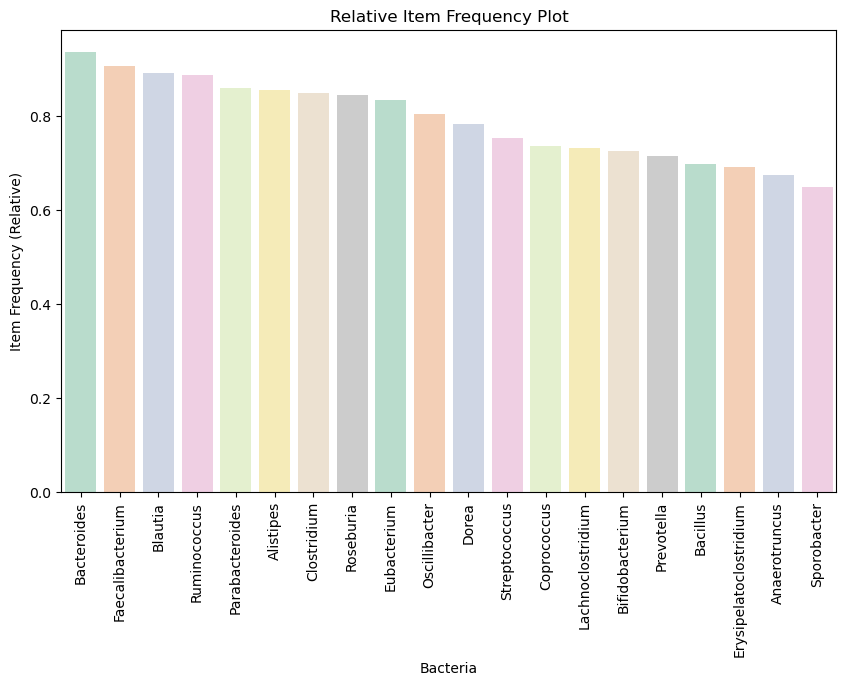

In [69]:
item_frequencies = ohe_df.sum(axis=0) / len(ohe_df)  # relative frequencies
item_frequencies_sorted = item_frequencies.sort_values(ascending=False).head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x=item_frequencies_sorted.index, y=item_frequencies_sorted.values, hue=None, palette="Pastel2")
plt.title("Relative Item Frequency Plot")
plt.ylabel("Item Frequency (Relative)")
plt.xlabel('Bacteria')
plt.xticks(rotation=90)
plt.show()